The data for this notebook comes from the [Our World In Data](https://github.com/owid/covid-19-data) GitHub repository, which is updated daily.

#### Importing necessary packages

In [2]:
import pandas as pd
import calendar
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reading data and storing in pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
print('dataframe has: {} rows'.format(df.shape[0]))

dataframe has: 164945 rows


In [4]:
#setting up dates
today = dt.datetime.now()
first_month_day = today.replace(day = 1)
dt_curryear = today.strftime("%Y")
dt_currmonth = today.strftime("%m")
dt_day = today.strftime("%d")
startDay = first_month_day.strftime('%Y-%m-%d')
endDay = today.strftime('%Y-%m-%d')

In [5]:
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


#### Extracting a subset of data

In [6]:
# Selecting a subset of data corresponding to the location Uruguay
uy = df[df["location"] == "Uruguay"]
# Printing first 5 rows
uy.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
158167,URY,South America,Uruguay,2022-02-23,827814.0,4030.0,4642.571,6919.0,14.0,14.143,...,14.0,19.9,NaN,2.8,77.91,0.817,NaN,NaN,NaN,NaN
158168,URY,South America,Uruguay,2022-02-24,831950.0,4136.0,4445.286,6932.0,13.0,13.429,...,14.0,19.9,NaN,2.8,77.91,0.817,NaN,NaN,NaN,NaN
158169,URY,South America,Uruguay,2022-02-25,835346.0,3396.0,3904.857,6949.0,17.0,13.571,...,14.0,19.9,NaN,2.8,77.91,0.817,NaN,NaN,NaN,NaN
158170,URY,South America,Uruguay,2022-02-26,838341.0,2995.0,3710.571,6961.0,12.0,13.714,...,14.0,19.9,NaN,2.8,77.91,0.817,NaN,NaN,NaN,NaN
158171,URY,South America,Uruguay,2022-02-27,840511.0,2170.0,3543.857,6977.0,16.0,14.000,...,14.0,19.9,NaN,2.8,77.91,0.817,NaN,NaN,NaN,NaN


In [7]:
# Selecting a subset of data corresponding to the location Uruguay
uy_to_date = uy[uy["date"] > startDay]

In [11]:
# How many rows has the new dataframe?
print('dataframe has: {} rows'.format(uy.shape[0]))

dataframe has: 717 rows


In [8]:
!ls /datasets/my-drive

 appsheet		     'macOS Catalina ISO by Geekrar.rar'
 bkp			     'Office 2007+SERIAL'
'BTC prices.desktop'	      planif.desktop
'Cheat sheets'		      reading
'Colab Notebooks'	      tables
'cuadro de control.desktop'  'VirtualBox Boot Image by Geekrar.rar'
 data			     'White pappers'
 files


In [9]:
#Sending the subset of data to my drive as a .csv file
uy_to_date.to_csv(f'/datasets/my-drive/data/covid_data_{startDay}_{endDay}')

dataframe has: 717 rows


In [10]:
# Creating separate columns for day, month and year
uy_to_date['year'] = pd.DatetimeIndex(uy_to_date['date']).year
uy_to_date['month'] = pd.DatetimeIndex(uy_to_date['date']).month
uy_to_date['day'] = pd.DatetimeIndex(uy_to_date['date']).day

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

#### Visualizing the data for the cases that occurred in Uruguay during 2021

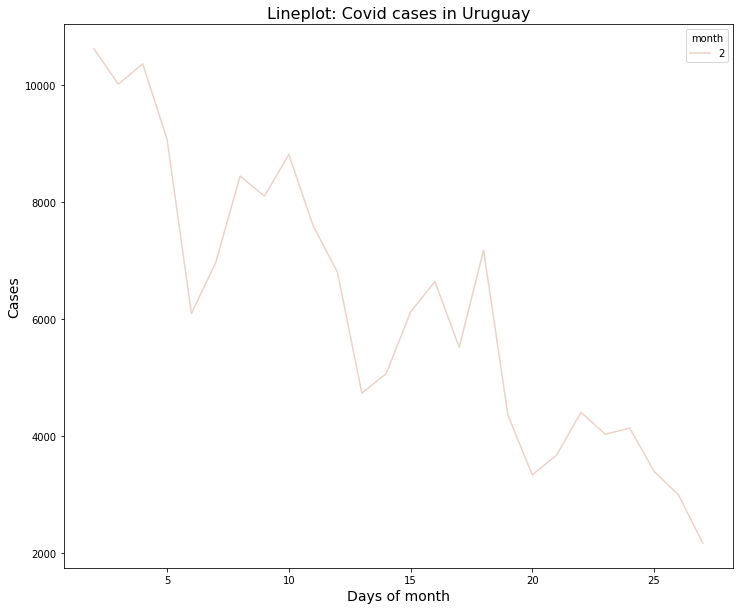

In [ ]:
plt.figure(figsize=(12,10))
plt.xticks(rotation=0)
sns.lineplot(x="day",
            y="new_cases",
            hue="month",
            data=uy_to_date)
plt.ylabel("Cases", size=14)
plt.xlabel("Days of month", size=14)
plt.title("Lineplot: Covid cases in Uruguay", size=16)

# Using plt.show() function, we can visualize the graph
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6adb34ba-5f10-47b2-bfea-90a3ef6fa602' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>